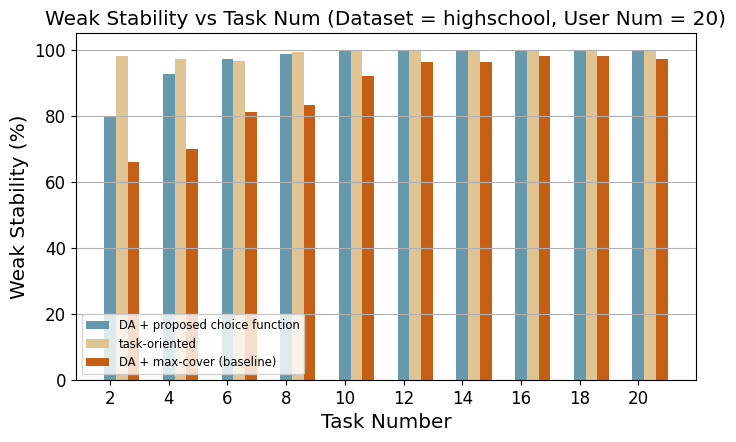

In [123]:
import pandas as pd

worker_num = 20
dataset = 'highschool'

df = pd.read_csv('./result/{}_result.csv'.format(dataset))
df = df[df['worker']== worker_num]
df1 = df.groupby(['method','task'])['fairness-pairwise'].agg(['mean','max','min']).reset_index()
import numpy as np
import matplotlib.pyplot as plt

methods = ['budget','heuristic','max-cover',]
labels = ['DA + proposed choice function','task-oriented','DA + max-cover (baseline)']
bar_width = 0.2

# 设置位置偏移，以便将直方图居中显示
bar_positions = range(10)
# 绘制折线图
plt.figure(figsize=(8, 4.5))
# colors = ['#3B6573','#92B0A6','#D2BCAC'] 
colors =['#6599AB','#E0C494','#C55F15']
# colors = ['#0E8F9A','#50906D','#9A8C46']
# x_labels = [20,40,60,80,100,120,140,160,180,200]
x_labels =[2,4,6,8,10,12,14,16,18,20]
plt.xticks(bar_positions,x_labels,fontsize='large')
plt.yticks(fontsize='large')
plt.grid(True,axis='y')
for i,method in enumerate(methods):
    method_data = df1[(df1['method'] == method)&(df1['task'].isin(x_labels))]
    current_bar_positions = [pos + i * bar_width for pos in bar_positions]
    plt.bar(current_bar_positions, method_data['mean']*100,width = bar_width,label=labels[i],color= colors[i])

# 添加标签和图例
plt.xlabel('Task Number',fontsize='x-large') 
plt.ylabel('Weak Stability (%)',fontsize='x-large')
plt.title('Weak Stability vs Task Num (Dataset = {}, User Num = {})'.format(dataset,worker_num),fontsize='x-large')
plt.legend(fontsize='small',loc='lower left')

# 显示图形
plt.show()

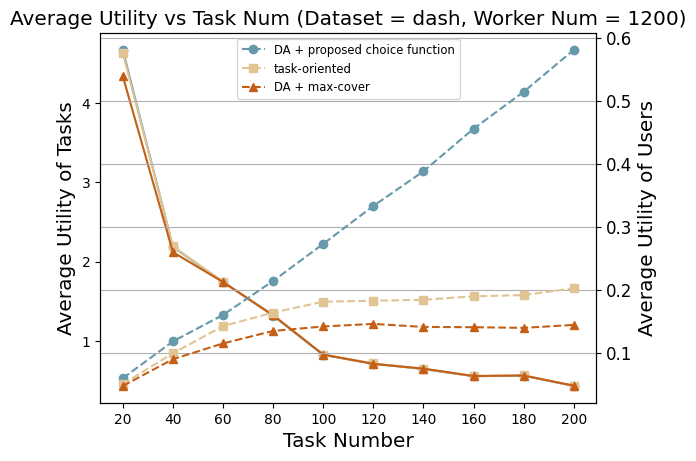

In [113]:
worker_num = 1200
dataset = 'dash'
df = pd.read_csv('./result/{}_result.csv'.format(dataset))
df = df[df['worker']== worker_num]
df1 = df.groupby(['method','task'])['avg-quality'].agg(['mean','max','min']).reset_index()
df2 = df.groupby(['method','task'])['avg-utility'].agg(['mean','max','min']).reset_index()
import matplotlib.pyplot as plt

methods = ['budget','heuristic','max-cover',]
labels = ['DA + proposed choice function','task-oriented','DA + max-cover']
markers = ['o','s','^']
colors =['#6599AB','#E0C494','#C55F15']

# 设置位置偏移，以便将直方图居中显示
bar_positions = range(len(df2['task'].unique()))
# 绘制折线图
fig, ax1 = plt.subplots()
ax2 = ax1.twinx() 
x_labels = [20,40,60,80,100,120,140,160,180,200]
# x_labels =[2,4,6,8,10,12,14,16,18,20]
plt.xticks(x_labels,fontsize='large')
plt.yticks(fontsize='large')
plt.yticks(fontsize='large')

for i,method in enumerate(methods):
    method_data1 = df1[(df1['method'] == method)&(df1['task'].isin(x_labels))]
    method_data2 = df2[(df2['method'] == method)&(df1['task'].isin(x_labels))]
    current_bar_positions = [pos + i * bar_width for pos in bar_positions]
    ax1.plot(x_labels,method_data1['mean'],marker=markers[i],label=labels[i],color=colors[i])
    ax2.plot(x_labels,method_data2['mean'],marker=markers[i],label=labels[i],color=colors[i],linestyle='--')

# 添加标签和图例
ax1.set_xlabel('Task Number',fontsize = 'x-large')
ax1.set_ylabel('Average Utility of Tasks',fontsize = 'x-large')
ax2.set_ylabel('Average Utility of Users',fontsize = 'x-large')
plt.title('Average Utility vs Task Num (Dataset = {}, Worker Num = {})'.format(dataset, worker_num),fontsize = 'x-large')
plt.legend(fontsize='small',loc='upper center')

# 显示图形
plt.grid(True)
plt.show()